In [1]:
!pip install -r requirements.txt
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\mspat\appdata\local\temp\pip-req-build-qsh0ndyy
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\mspat\AppData\Local\Temp\pip-req-build-qsh0ndyy'


In [2]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=Cy3 --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing Snapshot20230209_DMSO_Cy3_TIF.tif
Done analyzing Snapshot20230209_Val15_Cy3_TIF.tif
Done analyzing Snapshot20230209_Val30_CY3_TIF.tif
The results were saved to Cy3\2023-02-09_PyIQ_output\18-38-16_PyIQ_out.csv
The results were saved to Cy3\2023-02-09_PyIQ_output\18-38-19_PyIQ_analyze_out.csv
Cy3\Snapshot20230209_DMSO_Cy3_TIF.tif
Cy3\Snapshot20230209_Val15_Cy3_TIF.tif
Cy3\Snapshot20230209_Val15_Cy3_TIF.tif
Figure(640x480)
Cy3\Snapshot20230209_DMSO_Cy3_TIF.tif
Cy3\Snapshot20230209_Val15_Cy3_TIF.tif
Cy3\Snapshot20230209_Val15_Cy3_TIF.tif
Figure(640x480)


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
imaq_24h=pd.read_csv('Cy3/2023-02-09_PyIQ_output/18-38-19_PyIQ_analyze_out.csv')
imaq_24h.tail()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
0,Cy3\Snapshot20230209_DMSO_Cy3_TIF.tif,2.166181,4.906263e+10,11.487666,32420.708928,12840.382210,4.640108,2.424171e+09,21987.260055,0.895286,...,1.000000,1.000000,0.000000,0.929527,0.171192,0.601954,0.992782,1.000000,1.000000,0.831014
1,Cy3\Snapshot20230209_Val15_Cy3_TIF.tif,2.056019,4.331591e+10,13.823671,28726.754254,8524.938145,4.648564,2.370800e+09,21790.891842,1.056265,...,0.886062,0.663916,0.336084,0.931220,0.022166,1.000000,0.983915,0.799994,0.882870,1.000000
2,Cy3\Snapshot20230209_Val30_CY3_TIF.tif,2.247169,4.359494e+10,9.306871,24622.707751,2796.579424,4.991905,2.306652e+09,22147.120796,1.080209,...,0.759475,0.217796,0.782204,1.000000,0.000000,0.483582,1.000000,0.468743,0.888557,0.673256


<AxesSubplot: xlabel='fSTD', ylabel='Count'>

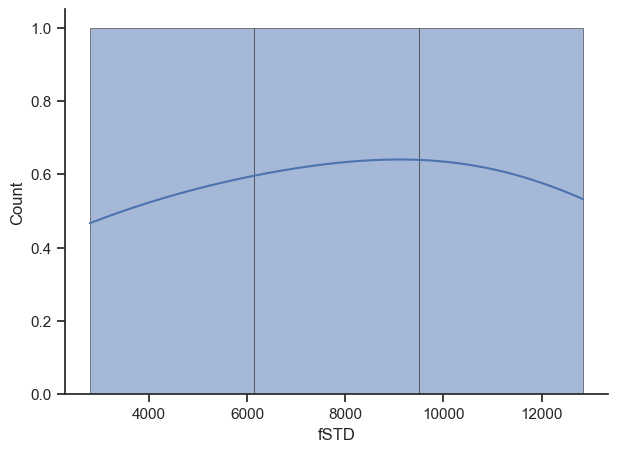

In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=imaq_24h, 
    x="fSTD", 
    kde=True,
    edgecolor=".3",
    linewidth=.5,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([5, 10, 20, 30, 50, 100])

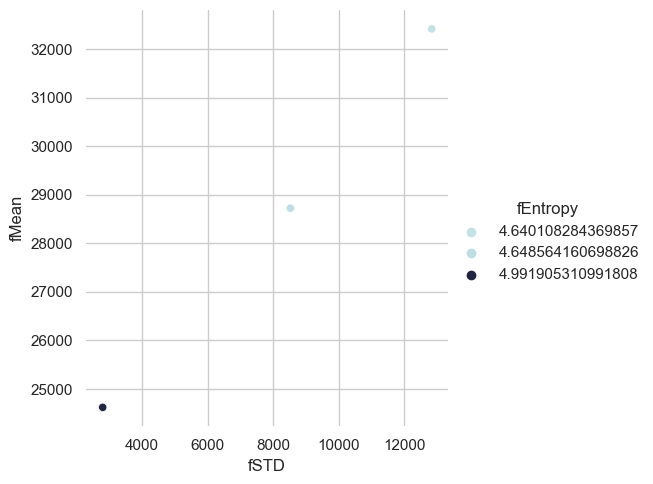

In [7]:
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=imaq_24h,
    x="fSTD", y="fMean",
    hue="fEntropy",# size="fEntropy",
    palette=cmap, sizes=(10, 200),
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [10]:
imaq_24h_sel=imaq_24h[imaq_24h['fSTD']<3]

In [12]:
imaq_24h_sel.Filename.count()

31

In [15]:
imaq_24h_sel.to_csv('20230206_CHOK1_HeLa_24h_filterOut.csv', sep=";") 